## Question 2


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 11.0 MB/s 
     |████████████████████████████████| 140 kB 44.7 MB/s 
     |████████████████████████████████| 384 kB 47.9 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#### Connecting to Amazon and download reviews

In [ ]:
boatrockerz_reviews=[]

In [ ]:
for i in range (1,31):
    ip=[]
    url ="https://www.amazon.in/Rockerz-450-Wireless-Bluetooth-Headphone/product-reviews/B07PR1CL3S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    boatrockerz_reviews = boatrockerz_reviews+ip

#### Downloading review from Amazon.in for the Earphones

In [ ]:
boatrockerz_reviews = list(set(boatrockerz_reviews))

In [ ]:
txt_upd = ' '.join(boatrockerz_reviews)

In [ ]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [ ]:
text_tokens = word_tokenize(txt_upd)

In [ ]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

###  Creating the Dataframe

In [ ]:
tf = TfidfVectorizer()

In [ ]:
text_tf = tf.fit_transform(tokens_without_sw)

In [ ]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df

,android,auditory,bass,beautiful,black,blockbuster,bluetooth,boat,budget,cancelling,...,rs,safe,side,sleek,sound,tight,ubuntu,wanted,weight,work
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
word_list = ' '.join(df)

In [ ]:
wordcloud = WordCloud(background_color='white',
                      width=1800,
                      height=1400).generate(word_list)

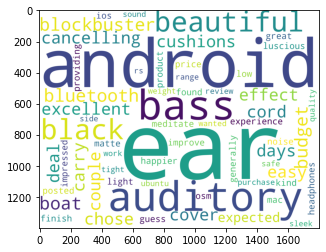

In [ ]:
plt.imshow(wordcloud)

## Sentimental Analysis

In [ ]:
with open(r"/content/positive-words (1).txt") as pw:
    positive_words = pw.read().split("\n")

In [ ]:
positive_words = positive_words[35:]

In [ ]:
with open(r"/content/negative-words (1).txt",encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [ ]:
negative_words = negative_words[35:]

In [ ]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [ ]:
wordcloud_neg = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [ ]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [ ]:
wordcloud_pos = WordCloud(
                      background_color='white',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## __4 Conclusion__ 

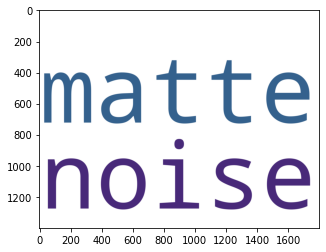

In [ ]:
plt.imshow(wordcloud_neg)

#### Above given is the wordcloud for negative reviews

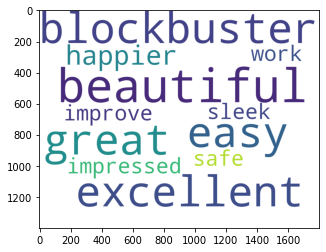

In [ ]:
plt.imshow(wordcloud_pos)

#### Above given is the wordcloud for positive reviews.